In [1]:
# Part A: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
Train = pd.read_csv('/content/train.csv') #Uploading the titanic data set


In [3]:
#Display descriptive statistics, information, and shape
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Train.info() # finding information on the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Train.shape # finding the number of rows and columns respectively of the data set

(891, 12)

In [6]:
Train = Train.drop(columns=['PassengerId']) # Deleting the PassengerId column of the data set
print(Train.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [7]:
#Part B
Train.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [8]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
Train_categorical = Train[categorical_cols]
print(Train_categorical.head())

      Sex Embarked  Pclass  SibSp  Parch
0    male        S       3      1      0
1  female        C       1      1      0
2  female        S       3      0      0
3  female        S       1      1      0
4    male        S       3      0      0


In [9]:
Train = Train.drop(columns=['Name', 'Ticket', 'Cabin']) # Deleting the Name, Ticket, and Cabin columns of the data set
print(Train.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [10]:

#Part B
#  median values for each Pclass
median_per_pclass = Train.groupby("Pclass").median(numeric_only=True)
print(median_per_pclass)

        Survived   Age  SibSp  Parch     Fare
Pclass                                       
1            1.0  37.0    0.0    0.0  60.2875
2            0.0  29.0    0.0    0.0  14.2500
3            0.0  24.0    0.0    0.0   8.0500


In [11]:

# Compute median age for each Pclass
median_ages = Train.groupby("Pclass")["Age"].median()
print(median_ages)


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [12]:
# Fill missing ages with corresponding Pclass median age value
Train["Age"] = Train["Age"].fillna(Train["Pclass"].map(median_ages))
print(Train.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [13]:
#  Label Encoder object
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode Sex column (Male -> 0, Female -> 1)
Train['Sex'] = label_encoder.fit_transform(Train['Sex'])
print(Train)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    1  22.0      1      0   7.2500        S
1           1       1    0  38.0      1      0  71.2833        C
2           1       3    0  26.0      0      0   7.9250        S
3           1       1    0  35.0      1      0  53.1000        S
4           0       3    1  35.0      0      0   8.0500        S
..        ...     ...  ...   ...    ...    ...      ...      ...
886         0       2    1  27.0      0      0  13.0000        S
887         1       1    0  19.0      0      0  30.0000        S
888         0       3    0  24.0      1      2  23.4500        S
889         1       1    1  26.0      0      0  30.0000        C
890         0       3    1  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [14]:
# Encode Embarked column (C -> 0, Q -> 1, S -> 2)
#Train['Embarked'] = label_encoder.fit_transform(Train['Embarked'])
#print(Train)


In [15]:
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder #Import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Changed sparse to sparse_output, and handle unknown values
 #Perform one-hot encoding on 'Embarked' column
encoded_embarked = encoder.fit_transform(Train[['Embarked']])

# Create a DataFrame for the encoded categories
encoded_columns = encoder.get_feature_names_out(['Embarked'])
embarked_df = pd.DataFrame(encoded_embarked, columns=encoded_columns)

# Concatenate the new one-hot-encoded DataFrame with the original (excluding 'Embarked')
Train = pd.concat([Train.drop(columns=['Embarked']), embarked_df], axis=1)
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0,0.0,1.0,0.0
887,1,1,0,19.0,0,0,30.0000,0.0,0.0,1.0,0.0
888,0,3,0,24.0,1,2,23.4500,0.0,0.0,1.0,0.0
889,1,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0


In [16]:
#Droping Embark_nan
Train = Train.drop('Embarked_nan', axis=1)
Train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0.0,0.0,1.0
887,1,1,0,19.0,0,0,30.0000,0.0,0.0,1.0
888,0,3,0,24.0,1,2,23.4500,0.0,0.0,1.0
889,1,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


Sex  Survived
1    0           468
0    1           233
1    1           109
0    0            81
Name: count, dtype: int64


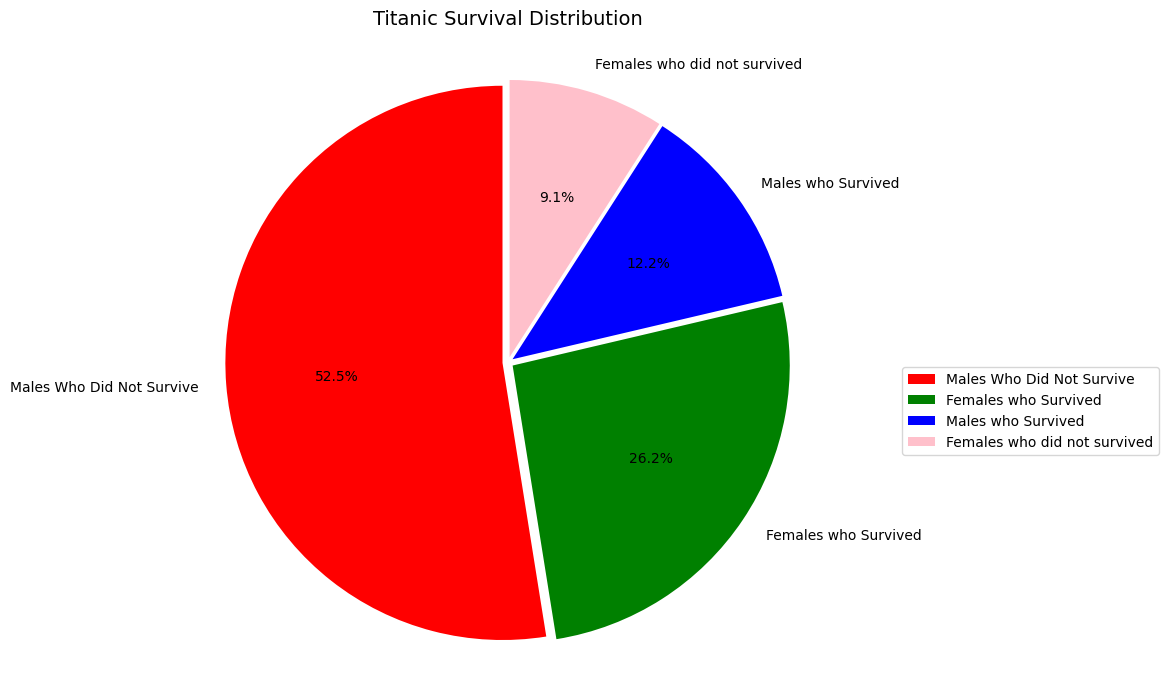

In [17]:
# Count the number of survivors and non-survivors
survival_counts = Train[['Sex', 'Survived']].value_counts()
print(survival_counts)

# Create labels for the pie chart
labels = ['Males Who Did Not Survive', 'Females who Survived', 'Males who Survived', 'Females who did not survived']
# Create custom colors
colors = ['Red', 'green', 'blue', 'pink']
# Create figure and axis with a specific figure size
plt.figure(figsize=(10, 8))

# Create pie chart
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02, 0.02, 0.02))

# Add a title
plt.title('Titanic Survival Distribution', pad=20, size=14)

# Add a legend
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

# Ensure the pie chart is circular
plt.axis('equal')

# Display the plot
plt.show()

In [18]:
#Train.to_csv("Train2.csv", index=False) # Save to a new file

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate the target variable (Survived) from features
X = Train.drop(columns=["Survived"])  # Features (excluding Survived)
y = Train["Survived"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Save the training set (including target) and test set (without target)
train_set = X_train.copy()
train_set["Survived"] = y_train  # Add the target back to the training set

# Display dataset sizes
print(f"Train set size: {train_set.shape}")
print(f"Test set size (without 'Survived'): {X_test.shape}")

Train set size: (712, 10)
Test set size (without 'Survived'): (179, 9)


In [20]:
X_train


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
331,1,1,45.5,0,0,28.5000,0.0,0.0,1.0
733,2,1,23.0,0,0,13.0000,0.0,0.0,1.0
382,3,1,32.0,0,0,7.9250,0.0,0.0,1.0
704,3,1,26.0,1,0,7.8542,0.0,0.0,1.0
813,3,0,6.0,4,2,31.2750,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,0.0,0.0,1.0
270,1,1,37.0,0,0,31.0000,0.0,0.0,1.0
860,3,1,41.0,2,0,14.1083,0.0,0.0,1.0
435,1,0,14.0,1,2,120.0000,0.0,0.0,1.0


In [21]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [22]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [23]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
709,3,1,24.0,1,1,15.2458,1.0,0.0,0.0
439,2,1,31.0,0,0,10.5000,0.0,0.0,1.0
840,3,1,20.0,0,0,7.9250,0.0,0.0,1.0
720,2,0,6.0,0,1,33.0000,0.0,0.0,1.0
39,3,0,14.0,1,0,11.2417,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,0.0,0.0,1.0
773,3,1,24.0,0,0,7.2250,1.0,0.0,0.0
25,3,0,38.0,1,5,31.3875,0.0,0.0,1.0
84,2,0,17.0,0,0,10.5000,0.0,0.0,1.0


In [24]:
# Combine the X_test and y_test plot a pie chart showing the survival rate of the sex


In [25]:
#scale age and fare
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age','Fare']])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale X_train's 'Age' and 'Fare' columns and assign the scaled values back to X_train
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age','Fare']]) # Scale X_train only
X_test[['Age', 'Fare']] = scaler.transform(X_test[['Age','Fare']]) # Scale X_test using the same scaler fit to the training data

In [26]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
331,1,1,1.260365,0,0,-0.078684,0.0,0.0,1.0
733,2,1,-0.443138,0,0,-0.377145,0.0,0.0,1.0
382,3,1,0.238263,0,0,-0.474867,0.0,0.0,1.0
704,3,1,-0.216005,1,0,-0.476230,0.0,0.0,1.0
813,3,0,-1.730230,4,2,-0.025249,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
106,3,0,-0.594561,0,0,-0.480162,0.0,0.0,1.0
270,1,1,0.616819,0,0,-0.030545,0.0,0.0,1.0
860,3,1,0.919664,2,0,-0.355804,0.0,0.0,1.0
435,1,0,-1.124540,1,2,1.683201,0.0,0.0,1.0


In [27]:
#Machine learning, using linear logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
Y_pre = model.predict(X_test)
acc_log = round(model.score(X_test, y_test) * 100, 2)
acc_log


81.01

In [28]:
#outputting the correlation of our model/patterns it found
coeff_df = pd.DataFrame(Train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df

,Feature,Correlation
0,Pclass,-0.990273
1,Sex,-2.590676
2,Age,-0.427813
3,SibSp,-0.302132
4,Parch,-0.107548
5,Fare,0.119406
6,Embarked_C,0.131884
7,Embarked_Q,-0.063722
8,Embarked_S,-0.281314


In [29]:
Train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,0.040700,-0.081658,0.007763
SibSp,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,-0.082853,0.040700,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.074115,-0.081658,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,0.007763,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


In [30]:
Test_New = pd.read_csv('/content/test.csv')

# Display basic information about the dataset
print("Dataset Info:")
Test_New.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [31]:
# Summary statistics
print("\nSummary Statistics:")
print(Test_New.describe())


Summary Statistics:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [32]:
# Check for missing values
print("\nMissing Values:")
print(Test_New.isnull().sum())


Missing Values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [33]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", Test_New.duplicated().sum())


Number of Duplicate Rows: 0


In [34]:
#Number of rows and Columns
print("Number of Rows:", Test_New.shape[0])
print("Number of Columns:", Test_New.shape[1])

Number of Rows: 418
Number of Columns: 11


In [35]:
#  median values for each Pclass
median_per_pclass = Test_New.groupby("Pclass").median(numeric_only=True)
print(median_per_pclass)

        PassengerId   Age  SibSp  Parch     Fare
Pclass                                          
1            1094.0  42.0    0.0    0.0  60.0000
2            1122.0  26.5    0.0    0.0  15.7500
3            1091.5  24.0    0.0    0.0   7.8958


In [36]:
# Show median ages for each Pclass
median_ages = Test_New.groupby("Pclass")["Age"].median()
print(median_ages)

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64


In [37]:
# Fill missing ages with corresponding Pclass median age value
Test_New["Age"] = Test_New["Age"].fillna(Test_New["Pclass"].map(median_ages))
print(Test_New.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [38]:
#  Label Encoder object
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode Sex column (Male -> 0, Female -> 1)
Test_New['Sex'] = label_encoder.fit_transform(Test_New['Sex'])
print(Test_New)

     PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick    1   
417         1309       3                      Peter, Master. Michael J    1   

      Age  SibSp  Parch              Ticket      Fa

In [39]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # Changed sparse to sparse_output
# Perform one-hot encoding on 'Embarked' column
encoded_embarked = encoder.fit_transform(Test_New[['Embarked']])

# Create a DataFrame for the encoded categories
encoded_columns = encoder.get_feature_names_out(['Embarked'])
embarked_df = pd.DataFrame(encoded_embarked, columns=encoded_columns)

# Concatenate the new one-hot-encoded DataFrame with the original (excluding 'Embarked')
Test_New = pd.concat([Test_New.drop(columns=['Embarked']), embarked_df], axis=1)
Test_New

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0
416,1308,3,"Ware, Mr. Frederick",1,24.0,0,0,359309,8.0500,NaN,0.0,0.0,1.0


In [40]:
#Drop passengerId
Test_New = Test_New.drop('PassengerId', axis=1)
Test_New

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0.0,1.0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0.0,0.0,1.0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0.0,1.0,0.0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0.0,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,NaN,0.0,0.0,1.0
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,1.0,0.0,0.0
415,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0,0.0,1.0
416,3,"Ware, Mr. Frederick",1,24.0,0,0,359309,8.0500,NaN,0.0,0.0,1.0


In [41]:
#Drop Cabin
Test_New = Test_New.drop('Cabin', axis=1)
Test_New


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0.0,1.0,0.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0.0,0.0,1.0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0.0,1.0,0.0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0.0,0.0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,0.0,0.0,1.0
414,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,1.0,0.0,0.0
415,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0.0,0.0,1.0
416,3,"Ware, Mr. Frederick",1,24.0,0,0,359309,8.0500,0.0,0.0,1.0


In [42]:
Test_New = Test_New.drop('Name', axis=1) #Droping the Nmae
Test_New

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,330911,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,363272,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,240276,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,315154,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,3101298,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,A.5. 3236,8.0500,0.0,0.0,1.0
414,1,0,39.0,0,0,PC 17758,108.9000,1.0,0.0,0.0
415,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0.0,0.0,1.0
416,3,1,24.0,0,0,359309,8.0500,0.0,0.0,1.0


In [43]:
Test_New = Test_New.drop('Ticket', axis=1) #Droping the Ticket
Test_New

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,0.0,0.0,1.0
414,1,0,39.0,0,0,108.9000,1.0,0.0,0.0
415,3,1,38.5,0,0,7.2500,0.0,0.0,1.0
416,3,1,24.0,0,0,8.0500,0.0,0.0,1.0


In [44]:
#scale age and fare
#from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale Test's 'Age' and 'Fare' columns and assign the scaled values
Test_New[['Age', 'Fare']] = scaler.fit_transform(Test_New[['Age','Fare']]) # Scale Test_New
Test_New

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0.393048,0,0,-0.497811,0.0,1.0,0.0
1,3,0,1.356309,1,0,-0.512660,0.0,0.0,1.0
2,2,1,2.512223,0,0,-0.464532,0.0,1.0,0.0
3,3,1,-0.184909,0,0,-0.482888,0.0,0.0,1.0
4,3,0,-0.570214,1,1,-0.417971,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,1,-0.416092,0,0,-0.493856,0.0,0.0,1.0
414,1,0,0.739822,0,0,1.312180,1.0,0.0,0.0
415,3,1,0.701291,0,0,-0.508183,0.0,0.0,1.0
416,3,1,-0.416092,0,0,-0.493856,0.0,0.0,1.0


In [46]:
# Now, you can make predictions
Y_new_prediction = model.predict(Test_New)
Y_new_prediction


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, Y_new_prediction)
print(f"Accuracy of the model on the test set: {accuracy * 100:.2f}%")

In [ ]:
X_train

In [ ]:
# pie chart for X_train
X_train = X_train.copy()
X_train["Survived"] = y_train
survival_counts = X_train[['Sex', 'Survived']].value_counts()
print(survival_counts)
# Create labels for the pie chart
labels = ['Males Who Did Not Survive', 'Females who Survived', 'Males who Survived', 'Females who did not survived']
# Create custom colors
colors = ['Red', 'green', 'blue', 'pink']
# Create figure and axis with a specific figure size
plt.figure(figsize=(10, 8))

# Create pie chart
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02, 0.02, 0.02))

# Add a title
plt.title('Titanic Survival Distribution', pad=20, size=14)

# Add a legend
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

# Ensure the pie chart is circular
plt.axis('equal')

# Display the plot
plt.show()

In [ ]:
# Combine Test_New and Y_new_prediction for analysis
Test_New= Test_New.copy()
Test_New["Survived"] = Y_new_prediction
survival_counts = Test_New[['Sex', 'Survived']].value_counts()
print(survival_counts)
# Create labels for the pie chart
labels = ['Males Who Did Not Survive', 'Females who Survived', 'Males who Survived', 'Females who did not survived']
# Create custom colors
colors = ['Red', 'green', 'blue', 'pink']
# Create figure and axis with a specific figure size
plt.figure(figsize=(10, 8))

# Create pie chart
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02, 0.02, 0.02))

# Add a title
plt.title('Titanic Survival Distribution', pad=20, size=14)

# Add a legend
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

# Ensure the pie chart is circular
plt.axis('equal')

# Display the plot
plt.show()